
(9993, 6, 6)
(9993,)

Epoch 1/10

313/313 [==============================] - 6s 5ms/step - loss: 0.0359
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0164
Epoch 3/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0148
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0144
Epoch 5/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0142
Epoch 6/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0139
Epoch 7/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0137
Epoch 8/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0138
Epoch 9/10
313/313 [==============================] - 2s 5ms/step - loss: 0.0137
Epoch 10/10
1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step


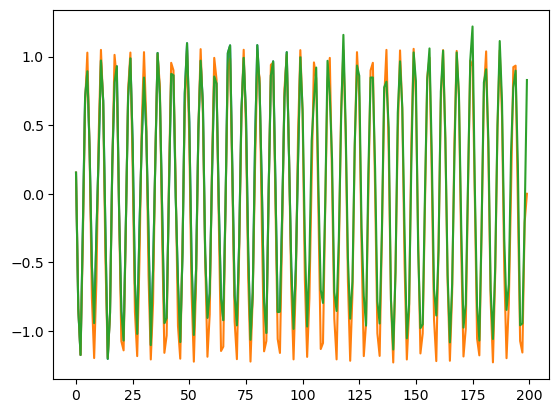

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GRU, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop 


N = 10000
data = np.array([np.sin(x + 3) for x in range(N)]) + 0.1*np.random.randn(N)
plt.plot(data[:100])


off = 3
length = off*2+1
X = np.array([ np.diag(np.hstack((data[i:i+off], data[i+off+1:i+length]))) for i in range(N-length)])
Y = data[off:N-off-1]
print(X.shape, Y.shape, sep='\n')


model = Sequential()
model.add(Input((length-1, length-1)))
model.add(Bidirectional(GRU(64, return_sequences=True)))  # Перший шар Bidirectional GRU
model.add(Bidirectional(GRU(32)))  # Другий шар Bidirectional GRU
model.add(Dense(1, activation='linear'))  # Вихідний шар


model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.01))


history = model.fit(X, Y, batch_size=32, epochs=10)

M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
  x = np.diag( np.hstack( (XX[i:i+off], data[i+off+1:i+length])) )
  x = np.expand_dims(x, axis=0)
  y = model.predict(x)
  XX[i+off] = y

plt.plot(XX[:M])
plt.plot(data[:M])

**Висновок:** на лабораторній роботі я навчився створювати двонаправлену рекурентну нейронну мережу  для розрахунку функції із шумом. 